In [1]:
import pandas as pd
import numpy as np
import json
#import sys
#import string
#import re
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
#import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt
from dateutil.parser import parse
import seaborn as sns

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [5]:
index=0
l = []
date = []
month = []
covid_hashtags = ["covid19","coronavirus","china","stayhome","lockdown"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        token_covid=entity['text'].lower()
        if token_covid in covid_hashtags:
            l.append(token_covid)
            token=data[index]['created_at']
            d = parse(token)
            #d1 = parse(token)
            d = d.strftime('%Y/%m/%d')
            date.append(d)
            #month.append(d1.strftime('%B'))
        
    index=index+1
    
df = pd.DataFrame(
    {'Date': date,
    'Hashtag': l
     #'Month': month
    })
df['Date']= pd.to_datetime(df['Date'])

Text(0, 0.5, 'Hashtag')

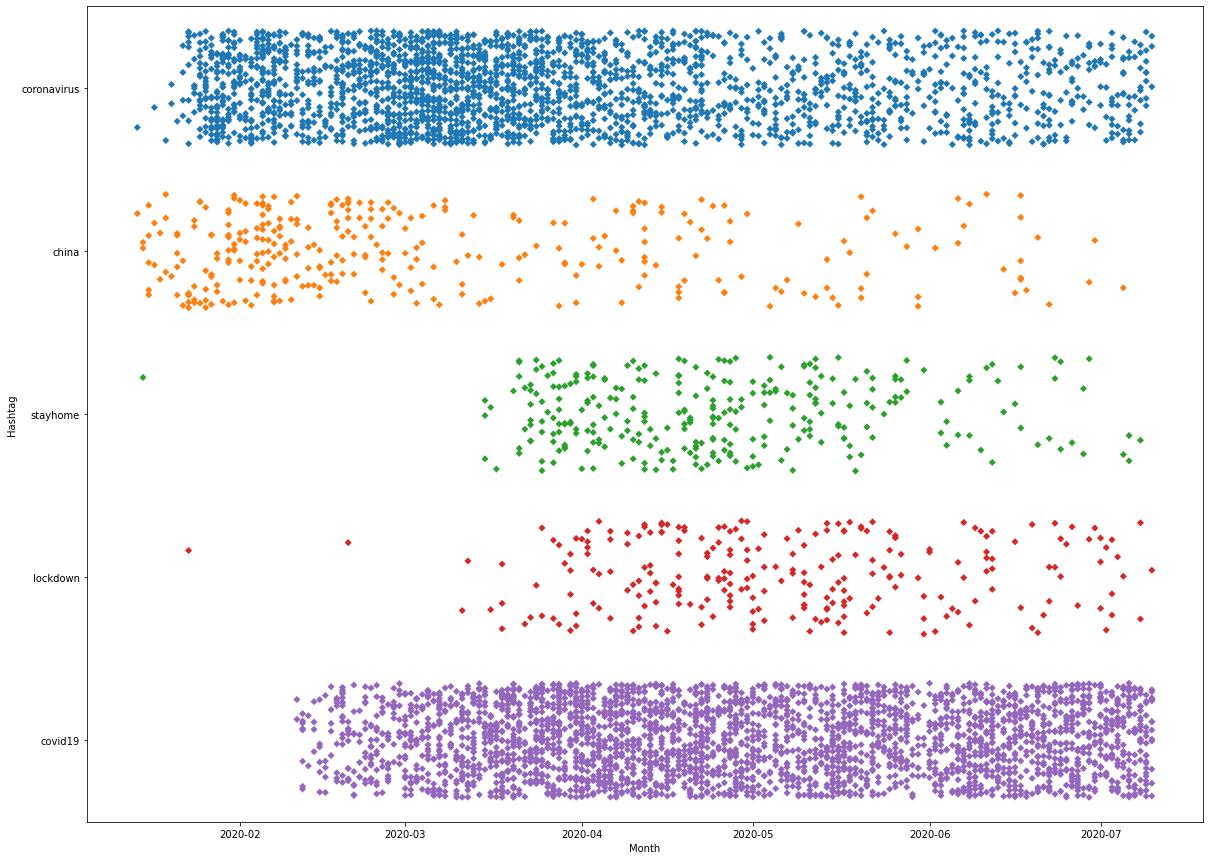

In [8]:
#http://alanpryorjr.com/visualizations/seaborn/stripplot/stripplot/


plt.figure(figsize=(20,15))
ax = sns.stripplot(x="Date", y="Hashtag", data=df, jitter=0.35, orient='h', marker="D")
#print(np.linspace(0,213,8)[:-1])
#plt.xticks(np.linspace(0,213,8)[:-1], ('Jan', 'Feb','Mar','Apr','May','Jun','Jul'))
plt.xlabel("Month")
plt.ylabel("Hashtag")
